In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 6장 GAN에 의한 이상 탐지의 준비 파일

In [2]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/만들면서 배우는 파이토치 딥러닝/6. GAN을 활용한 이상 화상 탐지"

/content/drive/MyDrive/Colab Notebooks/만들면서 배우는 파이토치 딥러닝/6. GAN을 활용한 이상 화상 탐지


In [4]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/만들면서 배우는 파이토치 딥러닝/6. GAN을 활용한 이상 화상 탐지'

In [5]:
# data 폴더가 없으면 작성한다
data_dir = "./data/"
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

In [6]:
import sklearn
print(sklearn.__version__)

1.0.2


In [7]:
# MNIST의 필기체 숫자 화상 다운로드
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, data_home = "./data/") # data_home으로 저장 위치를 지정

In [8]:
# 데이터 꺼내기
X = mnist.data
y = mnist.target

In [9]:
X.shape

(70000, 784)

이 화상 데이터의 라벨은 5입니다.


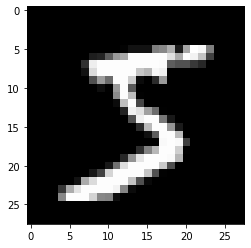

In [10]:
# MNIST의 첫번째 데이터 시각화
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap = 'gray')
print("이 화상 데이터의 라벨은 {}입니다.".format(y[0]))

In [11]:
# "data" 폴더의 아래에 "img_78" 폴더를 작성
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
  os.mkdir(data_dir_path)

In [12]:
# MNIST에서 숫자 7, 8의 화상만 "img_78" 폴더에 화상으로 저장해 나간다
count7 = 0
count8 = 0
max_num = 200 # 화상은 200장씩 작성

for i in range(len(X)):

  # 화상7 작성
  if (y[i] is "7") and (count7<max_num):
    file_path = "./data/img_78/img_7_" + str(count7) + ".jpg"
    im_f = (X.iloc[i].values.reshape(28, 28)) # 화상을 28 X 28의 형태로 변경
    pil_img_f = Image.fromarray(im_f.astype(np.uint8)) # 화상을 PIL으로
    pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC) # 64 X 64로 확대
    pil_img_f.save(file_path) # 저장
    count7 += 1

  # 화상8 작성
  if (y[i] is "8") and (count8<max_num):
    file_path = "./data/img_78/img_8_" + str(count8) + ".jpg"
    im_f = (X.iloc[i].values.reshape(28, 28)) # 화상을 28 X 28의 형태로 변경
    pil_img_f = Image.fromarray(im_f.astype(np.uint8)) # 화상을 PIL으로
    pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC) # 64 X 64로 확대
    pil_img_f.save(file_path) # 저장
    count8 += 1

  # 7과 8을 200장씩 작성했다면 break
  if (count7 >= max_num) and (count8>=max_num):
    break

In [16]:
# "data" 폴더의 아래에 "test" 폴더를 작성한다
data_dir_path = "./data/test/"
if not os.path.exists(data_dir_path):
  os.mkdir(data_dir_path)

In [14]:
# 위에서 7, 8의 화상 작성에 사용한 index의 최종값
i_start = i + 1
print(i_start)

2244


In [17]:
# MNIST에서 숫자 2, 7, 8의 화상만 "test" 폴더에 화상으로 저장해 나감
count2 = 0
count7 = 0
count8 = 0
max_num = 5 # 화상은 5장씩 작성

for i in range(i_start, len(X)): # i_start에서 시작

    # 화상2 작성
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test/img_2_"+str(count2)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count2+=1
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test/img_7_"+str(count7)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test/img_8_"+str(count8)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count8+=1 


In [18]:
# "data" 폴더의 아래에 "img_78_28size" 폴더를 작성
data_dir_path = "./data/img_78_28size/"
if not os.path.exists(data_dir_path):
  os.mkdir(data_dir_path)

In [19]:
# MNIST에서 숫자7, 8의 화상만 "img_78_28size" 폴더에 화상으로 저장해 나간다
count7=0
count8=0
max_num=200  # 화상은 200장씩 작성한다

for i in range(len(X)):
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78_28size/img_7_"+str(count7)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78_28size/img_8_"+str(count8)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count8+=1
    
    if (count7>=max_num) and (count8>=max_num):
        break


In [20]:
# "data" 폴더의 아래에 "test_28size" 폴더를 작성한다
data_dir_path = "./data/test_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 위에서 7,8의 화상 작성에 사용한 index의 최종값
i_start = i+1
print(i_start)

2244


In [21]:
# MNIST에서 숫자2, 7, 8의 화상만 "test_28size" 폴더에 화상으로 저장해 나간다
count2=0
count7=0
count8=0
max_num=5  # 화상은 5장씩 작성한다

for i in range(i_start,len(X)):  # i_start에서 시작
    
    # 화상2 작성
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test_28size/img_2_"+str(count2)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count2+=1 
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test_28size/img_7_"+str(count7)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test_28size/img_8_"+str(count8)+".jpg"
        im_f=(X.iloc[i].values.reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count8+=1 

